In [1]:
'''
Nombre de Grupo: Gustavo Reyes y Christian Perez
'''

'\nNombre de Grupo: Gustavo Reyes y Christian Perez\n'

In [2]:
import pandas as pd
from pycaret.classification import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('Taller2_MLE.csv')
df

,edad,segmento,saldo_total,numero_productos,visitas_app_mes,usa_web,usa_tarjeta_credito,reclamos_6m,satisfaccion_encuesta,tasa_credito_personal,rango_ingresos,region,cerrara_cuenta
0,48,Preferente,43791.80,5,11,0,1,1,4.2,36.82,Medio,Sierra,0
1,36,Estándar,17940.87,1,7,0,1,0,2.2,39.78,Muy Alto,Selva,0
2,48,Estándar,9308.09,4,3,0,1,1,1.0,28.36,Medio,Sierra,1
3,30,Estándar,709.76,5,5,1,1,0,5.0,45.73,Bajo,Selva,0
4,74,Preferente,20471.46,1,4,0,0,1,3.1,39.19,Medio,Sierra,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,30,Estándar,12464.23,5,4,1,0,3,2.8,27.93,Bajo,Costa,0
4996,58,Preferente,18939.17,5,3,1,1,0,2.1,34.95,Bajo,Selva,0
4997,30,Estándar,51162.08,3,3,0,1,0,2.3,35.58,Muy Alto,Sierra,0
4998,58,Estándar,14282.38,1,9,0,0,0,2.0,44.67,Medio,Selva,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   edad                   5000 non-null   int64  
 1   segmento               5000 non-null   object 
 2   saldo_total            5000 non-null   float64
 3   numero_productos       5000 non-null   int64  
 4   visitas_app_mes        5000 non-null   int64  
 5   usa_web                5000 non-null   int64  
 6   usa_tarjeta_credito    5000 non-null   int64  
 7   reclamos_6m            5000 non-null   int64  
 8   satisfaccion_encuesta  5000 non-null   float64
 9   tasa_credito_personal  5000 non-null   float64
 10  rango_ingresos         5000 non-null   object 
 11  region                 5000 non-null   object 
 12  cerrara_cuenta         5000 non-null   int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 507.9+ KB


Conteo de clases:
cerrara_cuenta
0    4298
1     702
Name: count, dtype: int64

Porcentaje de clases:
cerrara_cuenta
0    85.96
1    14.04
Name: proportion, dtype: float64


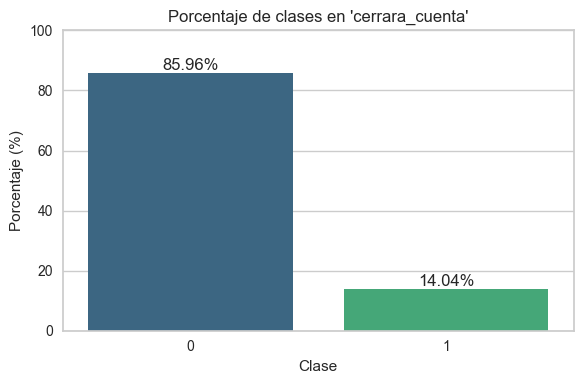

In [5]:

conteo = df['cerrara_cuenta'].value_counts()
porcentaje = df['cerrara_cuenta'].value_counts(normalize=True) * 100

print("Conteo de clases:")
print(conteo)
print("\nPorcentaje de clases:")
print(porcentaje.round(2))

# Graficar
plt.figure(figsize=(6, 4))
sns.barplot(x=porcentaje.index.astype(str), y=porcentaje.values, palette='viridis')
plt.title("Porcentaje de clases en 'cerrara_cuenta'")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Clase")
plt.ylim(0, 100)

# Mostrar etiquetas encima de las barras
for i, p in enumerate(porcentaje.values):
    plt.text(i, p + 1, f'{p:.2f}%', ha='center')

plt.tight_layout()
plt.show()

#### **_1. ¿Cuál es el porcentaje de clientes que cerraron su cuenta? ¿Está balanceado el dataset?_**

##### *RPTA: El porcentage de clientes que cerraron su cuenta fue de tan solo 14.04%, un porcentaje ínfimo a comparación de los clientes que si mantuvieron su cuenta que representan un 85.96%. Es un caso común por el tipo de negocio. Claramento esto nos indica que el dataset se encuentra desbalanceado.*

Correlación de variables numéricas con 'cerrara_cuenta':
reclamos_6m              0.024
usa_tarjeta_credito      0.023
visitas_app_mes          0.012
edad                     0.009
usa_web                 -0.005
tasa_credito_personal   -0.020
saldo_total             -0.033
numero_productos        -0.039
satisfaccion_encuesta   -0.140
Name: cerrara_cuenta, dtype: float64


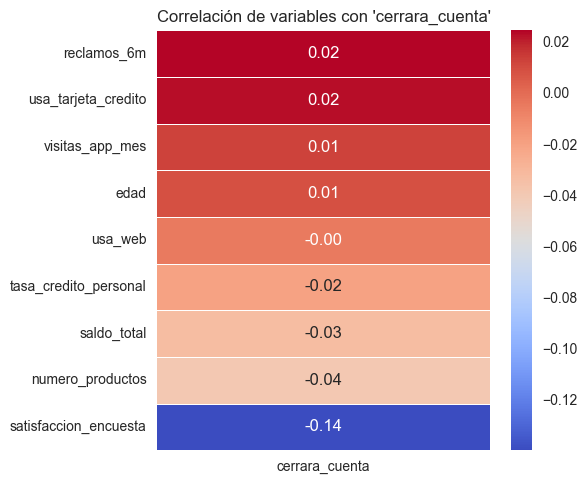

In [6]:
# Seleccionamos solo variables numéricas
variables_numericas = df.select_dtypes(include=['int64', 'float64'])

# Calculamos la correlación de cada variable con la target
correlaciones = variables_numericas.corr()['cerrara_cuenta'].drop('cerrara_cuenta')
correlaciones_ordenadas = correlaciones.sort_values(ascending=False)

# Mostrar correlaciones numéricamente
print("Correlación de variables numéricas con 'cerrara_cuenta':")
print(correlaciones_ordenadas.round(3))

# Visualizar como heatmap vertical
plt.figure(figsize=(6, 5))
sns.heatmap(correlaciones_ordenadas.to_frame(), 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            cbar=True,
            linewidths=0.5)

plt.title("Correlación de variables con 'cerrara_cuenta'")
plt.tight_layout()
plt.show()

#### **_2. ¿Qué variables tienen mayor correlación con cerrara_cuenta?_**

##### *RPTA: La variable independiente que tiene mayor correlacion con la target es "satisfaccion_encuesta". Las personas tienden a cerrar sus cuentas cuando la satifasccion en menor.*

In [8]:
# 4. Configuración PyCaret con enfoque explicativo y ético
clf = setup(data=df,
            target='cerrara_cuenta',
            session_id=2025,
            categorical_features=['segmento','rango_ingresos','region'],
            transformation=True,
            #polynomial_features=True,
            #bin_numeric_features=['edad', 'saldo_total'],
            #feature_interaction=True,
            remove_multicollinearity=True,
            multicollinearity_threshold=0.85)
            #silent=True)

,Description,Value
0,Session id,2025
1,Target,cerrara_cuenta
2,Target type,Binary
3,Original data shape,"(5000, 13)"
4,Transformed data shape,"(5000, 20)"
5,Transformed train set shape,"(3500, 20)"
6,Transformed test set shape,"(1500, 20)"
7,Numeric features,9
8,Categorical features,3
9,Preprocess,True


In [10]:
# 5. Comparación por Recall (prioriza detectar clientes que cerraron su cuenta)
best_model = compare_models(sort='Recall')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:09:41
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.4869,0.4731,0.4791,0.1282,0.1762,-0.0204,-0.0233,0.1020
dt,Decision Tree Classifier,0.7469,0.5059,0.1710,0.1497,0.1593,0.0115,0.0115,0.0930
svm,SVM - Linear Kernel,0.7851,0.5762,0.1202,0.2375,0.0674,0.0204,0.0371,0.1010
knn,K Neighbors Classifier,0.8451,0.5208,0.0284,0.1933,0.0485,0.0107,0.0187,0.1060
nb,Naive Bayes,0.8543,0.6161,0.0244,0.2619,0.0442,0.0225,0.0414,0.0940
lightgbm,Light Gradient Boosting Machine,0.8500,0.5951,0.0203,0.2352,0.0365,0.0095,0.0232,0.2500
et,Extra Trees Classifier,0.8557,0.6171,0.0102,0.2033,0.0192,0.0064,0.0158,0.2650
gbc,Gradient Boosting Classifier,0.8571,0.6188,0.0082,0.2500,0.0158,0.0065,0.0217,0.3470
rf,Random Forest Classifier,0.8583,0.6225,0.0020,0.1000,0.0040,0.0001,0.0016,0.3000
lr,Logistic Regression,0.8597,0.6329,0.0000,0.0000,0.0000,0.0000,0.0000,0.2670


#### **_3. ¿Cuál es el mejor modelo en AUC? ¿Y en Recall?_**

##### *RPTA: El mejor modelo en AUC es "logistic Regression" con un valor de 0.6323; mientras que el mejor modelo con Recall es el 'Quadratic Discriminant Analysis'.*

#### **_Pregunta 4. ¿Qué combinación de variables permite identificar clientes silenciosos que se van (sin reclamos)?_**

##### *Se define a los clientes silenciosos, a aquellos clientes que no han realizado reclamo alguna en los 6 meses, y sin embargo, terminaron cerrando sus cuentas y cancelando el producto.* 

In [11]:
df['reclamos_6m'].unique()

array([1, 0, 2, 3, 4, 6, 5], dtype=int64)

In [12]:
clientes_silenciosos = df[(df['cerrara_cuenta'] == 1) & (df['reclamos_6m'] == 0)]
clientes_silenciosos.describe()

,edad,saldo_total,numero_productos,visitas_app_mes,usa_web,usa_tarjeta_credito,reclamos_6m,satisfaccion_encuesta,tasa_credito_personal,cerrara_cuenta
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.0,417.000000,417.000000,417.0
mean,46.997602,19682.240240,2.755396,6.074341,0.702638,0.635492,0.0,2.646523,34.449424,1.0
std,16.642089,14004.883988,1.403165,2.487805,0.457646,0.481870,0.0,1.134657,8.268616,0.0
min,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,10.000000,1.0
25%,32.000000,7543.990000,1.000000,4.000000,0.000000,0.000000,0.0,1.800000,29.340000,1.0
50%,47.000000,19344.520000,3.000000,6.000000,1.000000,1.000000,0.0,2.400000,34.890000,1.0
75%,62.000000,29840.220000,4.000000,8.000000,1.000000,1.000000,0.0,3.600000,40.050000,1.0
max,74.000000,63201.240000,5.000000,16.000000,1.000000,1.000000,0.0,5.000000,53.920000,1.0


In [13]:
# Comparar con quienes también se fueron pero SÍ reclamaron
se_fueron_con_reclamo = df[(df['cerrara_cuenta'] == 1) & (df['reclamos_6m'] > 0)]
se_fueron_con_reclamo.describe()

,edad,saldo_total,numero_productos,visitas_app_mes,usa_web,usa_tarjeta_credito,reclamos_6m,satisfaccion_encuesta,tasa_credito_personal,cerrara_cuenta
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.0
mean,45.750877,18756.654877,2.989474,6.192982,0.680702,0.645614,1.308772,2.586316,34.780211,1.0
std,16.463501,13980.202946,1.359588,2.567666,0.467025,0.479168,0.678721,1.167784,8.669050,0.0
min,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,10.000000,1.0
25%,32.000000,6109.570000,2.000000,5.000000,0.000000,0.000000,1.000000,1.500000,29.060000,1.0
50%,46.000000,18642.810000,3.000000,6.000000,1.000000,1.000000,1.000000,2.300000,34.340000,1.0
75%,59.000000,29041.970000,4.000000,8.000000,1.000000,1.000000,1.000000,3.600000,40.580000,1.0
max,74.000000,53010.260000,5.000000,17.000000,1.000000,1.000000,6.000000,4.900000,60.700000,1.0


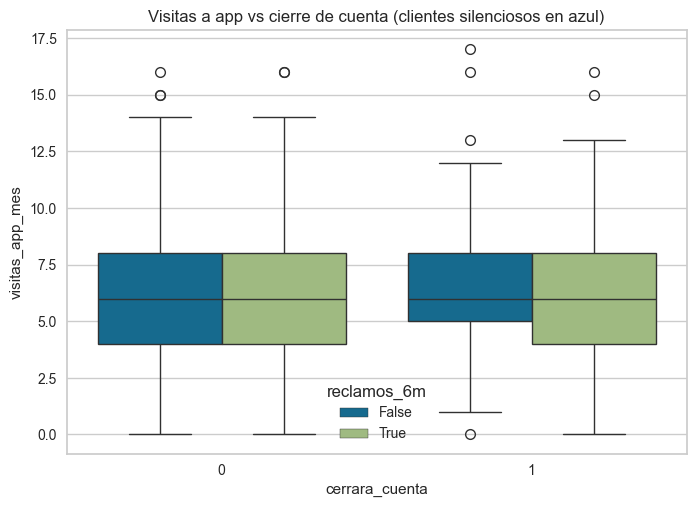

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='cerrara_cuenta', y='visitas_app_mes', hue=(df['reclamos_6m'] == 0))
plt.title("Visitas a app vs cierre de cuenta (clientes silenciosos en azul)")
plt.show()

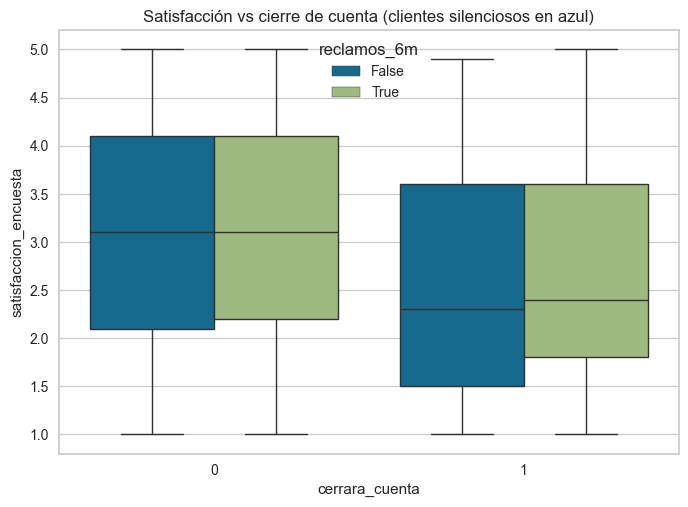

In [15]:
sns.boxplot(data=df, x='cerrara_cuenta', y='satisfaccion_encuesta', hue=(df['reclamos_6m'] == 0))
plt.title("Satisfacción vs cierre de cuenta (clientes silenciosos en azul)")
plt.show()

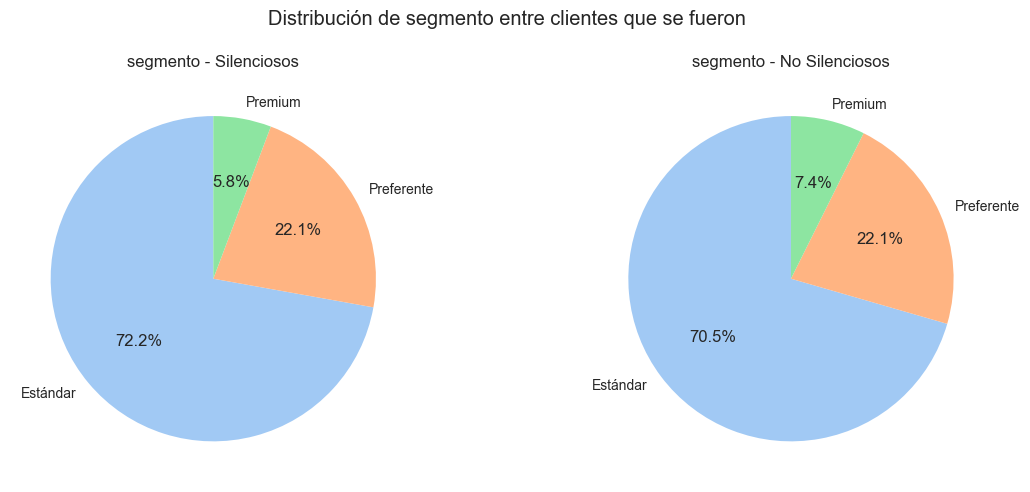

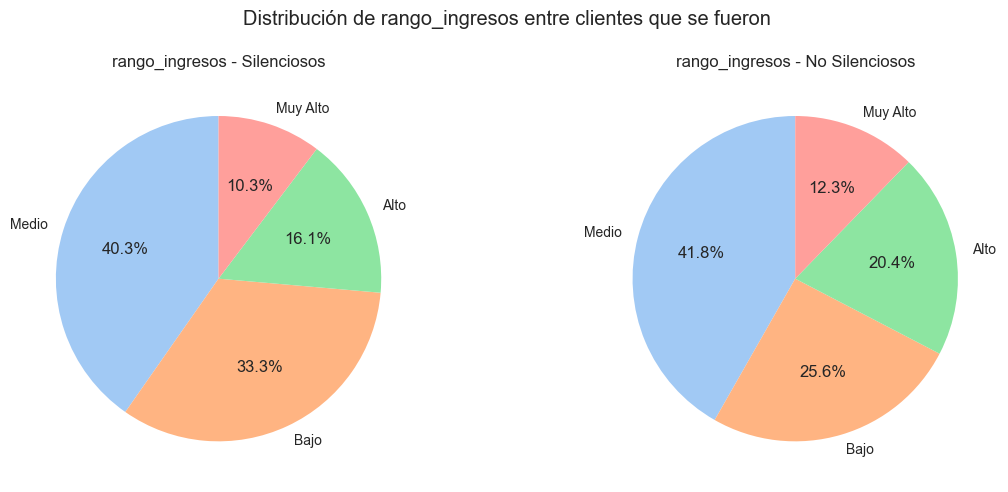

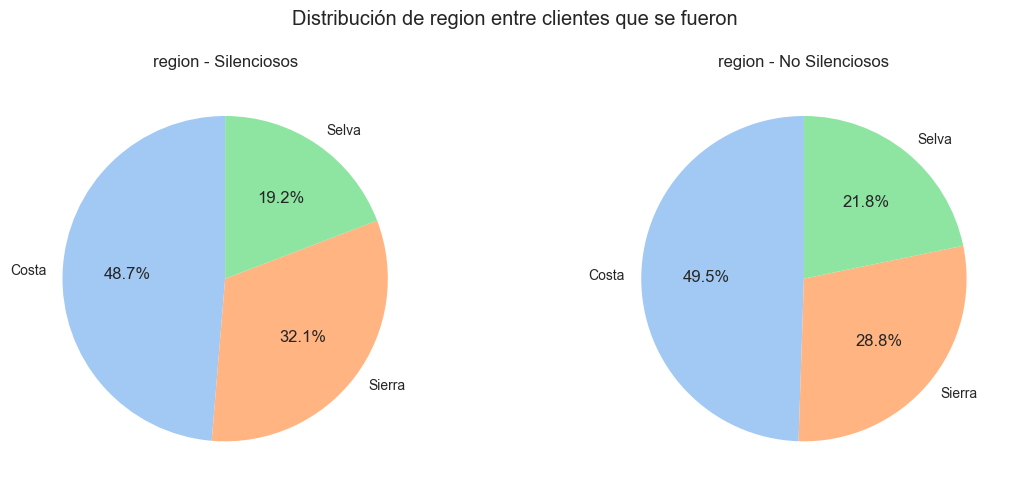

In [16]:
# Definimos los grupos
silenciosos = df[(df['cerrara_cuenta'] == 1) & (df['reclamos_6m'] == 0)]
no_silenciosos = df[(df['cerrara_cuenta'] == 1) & (df['reclamos_6m'] > 0)]

# Variables categóricas a analizar
categoricas = ['segmento', 'rango_ingresos', 'region']

# Graficamos
for var in categoricas:
    conteo_silenciosos = silenciosos[var].value_counts()
    conteo_no_silenciosos = no_silenciosos[var].value_counts()

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    colors = sns.color_palette('pastel')

    axes[0].pie(conteo_silenciosos, labels=conteo_silenciosos.index, 
                autopct='%1.1f%%', startangle=90, colors=colors)
    axes[0].set_title(f'{var} - Silenciosos')

    axes[1].pie(conteo_no_silenciosos, labels=conteo_no_silenciosos.index, 
                autopct='%1.1f%%', startangle=90, colors=colors)
    axes[1].set_title(f'{var} - No Silenciosos')

    plt.suptitle(f'Distribución de {var} entre clientes que se fueron')
    plt.tight_layout()
    plt.show()

##### *Rpta: La principal variable que permite identificar aquellos clientes que se van sin reclamar, es la variable target y su clase 1, y la variable independiente reclamos_6m con clase 0. Sin embargo, se analizaron otras variables para determinar su relevancia para determinar a los clientes silenciosos y se hizo una comparativa con aquellos que clientes que no fueron silenciosos. Concluimos que en ambos grupos silenciosos y no silenciosos, las variables tienen un comportamiento similar. Rescantando que aquellos clientes que son silenciosos que se van sin reclamos, el 33% son de ingresos bajos, mientras que los clientes no silenciosos, son el 25.6%.*

#### **_5. Qué pasa si el modelo predice mal un cliente que no se iba (falso positivo)? ¿Y uno que sí se iba (falso negativo)?_**
##### *Rpta: Uno de los principales problemas que se generaría si el modelo predice mal y genera un falso positivo es que se pierde efectividad en la retencion del cliente, puesto que activa de manera innecesaria el mecanismo de retención para un cliente que no tiene intencion de cancelar su cuenta, generando costos en tiempo, dinero y recursos inncesarios a la empresa. Por parte del cliente puede sentir incomodidad al hacerlo pensar que lo quieren convencer de algo que en realidad no necesita.*
##### *Si el modelo predice mal y genera falsos negativos, lo que este error generaría sería que la empresa perdiera poder de retención puesto que el cliente se cancelaría su cuenta sin intervención. Lo que generaría grandes pérdidas económicas a la empresa, incluso mayores a los falsos positivos, puesto que la recuperación de un cliente perdido es mucho más costoso que mantener a uno actual.*

#### **_6.¿Qué umbral de score (default 0.5 vs optimizado por KS) deberías usar para reducir la pérdida financiera?_**


In [17]:
qda_model = create_model('qda') #Cuadratic Discriminant Analysis

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7629,0.4712,0.1224,0.1304,0.1263,-0.0107,-0.0107
1,0.7657,0.4679,0.1429,0.1489,0.1458,0.0101,0.0101
2,0.5914,0.4260,0.1633,0.0727,0.1006,-0.1154,-0.1313
3,0.2114,0.5625,0.8980,0.1397,0.2418,-0.0007,-0.0027
4,0.3343,0.4753,0.6939,0.1349,0.2259,-0.0111,-0.0235
5,0.1657,0.5469,0.9592,0.1395,0.2435,-0.0012,-0.0078
6,0.8286,0.3700,0.0408,0.1333,0.0625,-0.0033,-0.0041
7,0.2200,0.5226,0.9388,0.1456,0.2521,0.0127,0.0489
8,0.4000,0.4335,0.5714,0.1290,0.2105,-0.0232,-0.0404


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [18]:
tuned_qda = tune_model(qda_model,optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6400,0.4473,0.2449,0.1188,0.1600,-0.0352,-0.0389
1,0.7171,0.5879,0.3265,0.1951,0.2443,0.0837,0.0879
2,0.6886,0.5558,0.3469,0.1809,0.2378,0.0658,0.0713
3,0.6457,0.5145,0.3265,0.1495,0.2051,0.0162,0.0182
4,0.7143,0.5994,0.3469,0.2000,0.2537,0.0926,0.0979
5,0.7000,0.5594,0.2857,0.1667,0.2105,0.0409,0.0432
6,0.7171,0.6405,0.4694,0.2396,0.3172,0.1619,0.1764
7,0.6886,0.5352,0.2653,0.1512,0.1926,0.0173,0.0184
8,0.6743,0.6013,0.3878,0.1845,0.2500,0.0744,0.0828


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


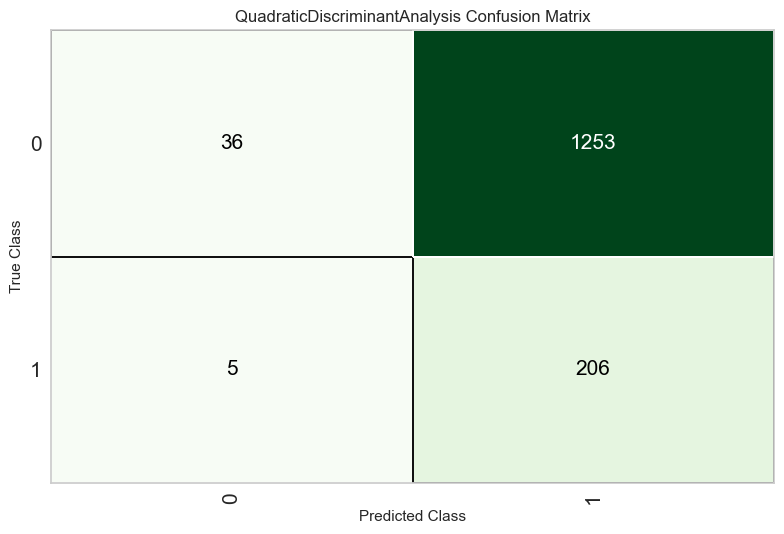

In [19]:
plot_model(tuned_qda, plot='confusion_matrix')

In [ ]:
evaluate_model(tuned_qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

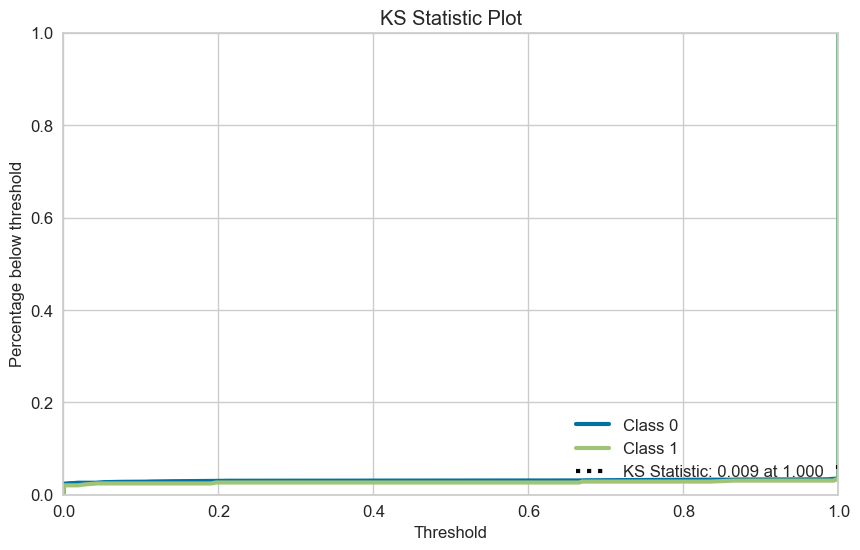

In [31]:
# Aplicamos el balanceo de datos
clf = setup(data=df,
            target='cerrara_cuenta',
            session_id=2025,
            categorical_features=['segmento', 'rango_ingresos', 'region'],
            transformation=True,
            polynomial_features=True,
            #bin_numeric_features=['edad'],  # u otras relevantes
            remove_multicollinearity=True,
            multicollinearity_threshold=0.85,
            fix_imbalance=True, 
            fix_imbalance_method='smote'
)

,Description,Value
0,Session id,2025
1,Target,cerrara_cuenta
2,Target type,Binary
3,Original data shape,"(5000, 13)"
4,Transformed data shape,"(7518, 133)"
5,Transformed train set shape,"(6018, 133)"
6,Transformed test set shape,"(1500, 133)"
7,Numeric features,9
8,Categorical features,3
9,Preprocess,True


In [32]:
best_model_bal = compare_models(sort='Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.5509,0.5388,0.4929,0.1549,0.2357,0.0282,0.0373,0.5860
svm,SVM - Linear Kernel,0.5777,0.5850,0.4652,0.1970,0.2111,0.0491,0.0536,0.6720
nb,Naive Bayes,0.7231,0.5643,0.2688,0.1774,0.2132,0.0539,0.0559,0.5600
dt,Decision Tree Classifier,0.7466,0.5288,0.2260,0.1813,0.2004,0.0528,0.0532,0.6280
lr,Logistic Regression,0.7937,0.5785,0.1609,0.2005,0.1753,0.0611,0.0623,2.1980
et,Extra Trees Classifier,0.8449,0.6121,0.0489,0.2320,0.0790,0.0346,0.0467,0.8800
ada,Ada Boost Classifier,0.8500,0.6085,0.0408,0.2651,0.0698,0.0350,0.0533,2.2610
ridge,Ridge Classifier,0.8526,0.5953,0.0244,0.2998,0.0444,0.0197,0.0428,0.5460
lightgbm,Light Gradient Boosting Machine,0.8491,0.6124,0.0184,0.1619,0.0328,0.0050,0.0085,1.1960
rf,Random Forest Classifier,0.8549,0.6217,0.0142,0.2000,0.0263,0.0102,0.0216,0.9950


In [34]:
knn_model_bal = create_model('knn') #K Neighbors Classifier

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5543,0.5637,0.4898,0.1548,0.2353,0.0286,0.0381
1,0.5829,0.6016,0.5918,0.1871,0.2843,0.0909,0.1210
2,0.5657,0.5615,0.5306,0.1677,0.2549,0.0535,0.0713
3,0.5400,0.5376,0.4490,0.1410,0.2146,0.0020,0.0027
4,0.5143,0.4457,0.4082,0.1242,0.1905,-0.0308,-0.0420
5,0.5371,0.5675,0.5714,0.1657,0.2569,0.0509,0.0715
6,0.5200,0.5304,0.4898,0.1437,0.2222,0.0073,0.0102
7,0.6029,0.5289,0.5102,0.1786,0.2646,0.0721,0.0908
8,0.5486,0.5278,0.4286,0.1391,0.2100,-0.0018,-0.0023


In [36]:
tuned_knn_bal = tune_model(knn_model_bal,optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4429,0.5485,0.5918,0.1422,0.2292,0.0045,0.0073
1,0.5057,0.6022,0.6735,0.1737,0.2762,0.0689,0.1058
2,0.4800,0.5712,0.6327,0.1590,0.2541,0.0391,0.0613
3,0.4686,0.5321,0.5918,0.1487,0.2377,0.0180,0.0282
4,0.4514,0.5049,0.5306,0.1333,0.2131,-0.0137,-0.0215
5,0.4429,0.5968,0.6531,0.1524,0.2471,0.0260,0.0437
6,0.4371,0.5559,0.6531,0.1509,0.2452,0.0230,0.0391
7,0.4714,0.5806,0.6327,0.1566,0.2510,0.0342,0.0545
8,0.5200,0.5879,0.5918,0.1638,0.2566,0.0478,0.0695


Fitting 10 folds for each of 10 candidates, totalling 100 fits


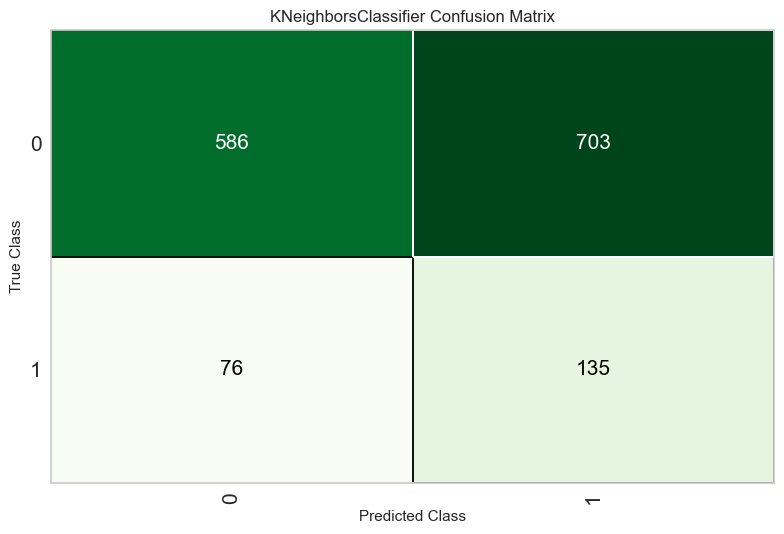

In [37]:
plot_model(tuned_knn_bal, plot='confusion_matrix')

In [ ]:
evaluate_model(tuned_knn_bal)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

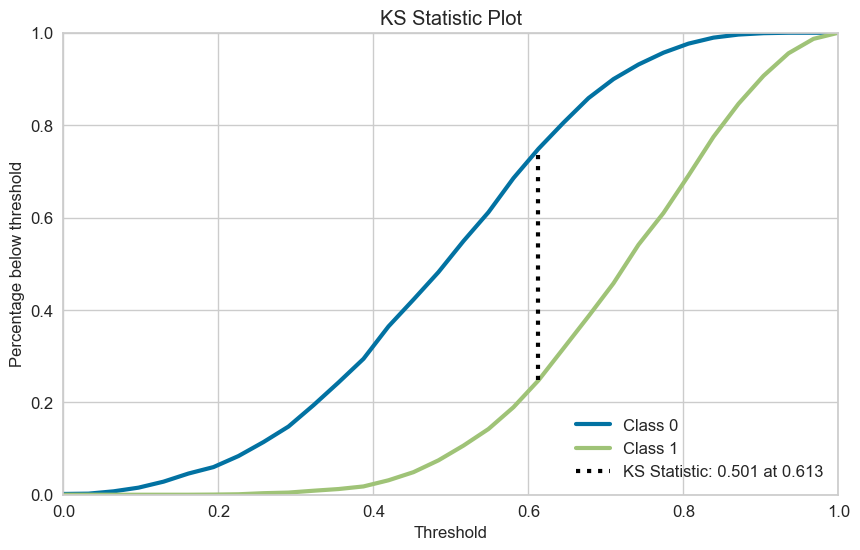

##### *Al aplicar el balanceo de datos a nuestro dataset, se genera un nuevo mejor modelo, el 'K neighbours classifier' el cual nos brinda un umbral de score de 0.613, mucho mayor al umbral por defecto de 0.5. Entendiendo que el umbral de KS es aquel valor que maximiza la separación entre clientes que se van y los que no, es decir, entre las tasas de verdaderos positivos y falsos positivos,por lo tanto, usariamos el umbral KS del modelo optimizado 0.613, puesto que este valor distingue mejor a los clientes que se irán de los que no, lo cual reduce significativamente la pérdida financiera.*

#### **_7. ¿Cómo explicarías con SHAP que un cliente Premium con buen saldo igual fue predicho como fuga?_**

In [64]:
# Realizando las predicciones

predicciones = predict_model(tuned_knn_bal)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.4807,0.5726,0.6398,0.1611,0.2574,0.0421,0.0661


In [66]:
pip install shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
interpret_model(tuned_knn_bal,plot='summary')

TypeError: This function only supports tree based models for binary classification: rf, et, dt, lightgbm.

In [74]:
# 8. Simulamos nuevo cliente premium con buen saldo
nuevo_cliente = pd.DataFrame({
    'edad': [40],
    'segmento': ['Premium'],
    'saldo_total': [50000], 
    'numero_productos': [3],
    'visitas_app_mes': [5],
    'usa_web': [1],
    'usa_tarjeta_credito': [1],
    'reclamos_6m': [0],
    'satisfaccion_encuesta': [5],
    'tasa_credito_personal': [0.12],
    'rango_ingresos': ['Alto'],
    'region': ['Costa']
})

# 2. Obtenemos pipeline de transformación desde PyCaret
pipeline = get_config('pipeline')

# 3. Transformamos cliente y predecir con modelo KNN
nuevo_cliente_transformado = pipeline.transform(nuevo_cliente)
prediccion = tuned_knn_bal.predict(nuevo_cliente_transformado)
score = tuned_knn_bal.predict_proba(nuevo_cliente_transformado)[:, 1]  # Probabilidad de fuga

# 4. Mostramos resultado
print("¿El cliente será fuga? (1 = sí, 0 = no):", int(prediccion[0]))
print("Score de fuga:", round(score[0], 3))

¿El cliente será fuga? (1 = sí, 0 = no): 1
Score de fuga: 0.516


##### *Lamentablemente nuestro mejor modelo es el de KNN Neighbour, que no es compatible para generar la interpretación por SHAP, sin embargo, realizando la simulación con las condiciones dadas de que un cliente 'Premium' y con saldo 'alto' sea predicho como cliente que fuga, la simulación nos muestra que efectivamente el cliente fuga, con un prediction score o probabilidad de 0.516 (51.6%). Vemos que a pesar que el cliente tiene un perfil positivo, el modelo lo clasifica como fuga, con una probabilidad apenas un poco por encima del umbral. Esto puede indicar que el modelo está detectando patrones ocultos que puedan indicar fuga, incluso si el cliente parece satisfecho y rentable. Se podría poner a este cliente en alerta temprana, y se podría realizar una campaña de retención dirigida, aunque su score haya sido moderado.*

#### **_¿Debería el modelo incluir la tasa de interés ofrecida como predictor, si luego esta puede cambiar según la política de retención?_**
##### **_Rpta: Eso depende del propósito del modelo. Si nuestro objetivo fuese predecir la fuga en condiciones actuales, es decir, sin intervención, si se debería incluir, como lo hemos hecho en el código lineas arriba, puesto que la tasa refleja condiciones reales del cliente en el momento de la predicción. Sin embargo, si el objetivo es evaluar políticas de retención futuras, es decir, simulaciones de escenarios cambiantes, no se debería incluir la tasa de interés._**

#### **_9.¿Cómo usarías este modelo en un sistema de reglas mixtas (modelo + regla de negocio) para que los gestores humanos no pierdan confianza?_**

##### *Se utilizaría el modelo como parte de sistema híbrido, donde por un lado el modelo predice la probabilidad de fuga (score) y las reglas de negocio garantizan ciertas condiciones mínimas, como atención de calidad y oportuna a los clientes premium sin importar el score. Esto generaría confianza por que el sistem per se respetaría el conocimiento del negocio*
##### *Otras consideraciones serían definir umbrales de acción claros y validarlos con expertos en el negocio, es decir, se definiría cuando actuar de manera automática y cuando derivarlo al gestor humano, para esto son importantes las métricas de recall, precisión y riesgo para justicar cada umbral.*
##### *Por último, se incluiría retroalimentación humana en el sistema, justamente porque esto permitiría que los gestores humanos registren si el modelo acertó o falló, y den sugerencias para ajustar reglas o interpretaciones.Todo esto generaría un sistema participativo que conllevaría a que los gestores humanos no pierdan confianza sino todo lo contario, esta confianza se fortalecería.*